## Exercise 1
You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

- Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [41]:
import pandas as pd

df = pd.read_csv('../data/housing-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [42]:
print(df.head(), '\n')
print(df.tail())

   sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900 

    sqft  bdrms  age   price
42  2567      4   57  314000
43  1200      3   76  299000
44   852      2   70  179900
45  1852      4   64  299900
46  1203      3   11  239500


In [43]:
df.isnull().sum()

sqft     0
bdrms    0
age      0
price    0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DD6B0E8390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002DD6B7268D0>], dtype=object)

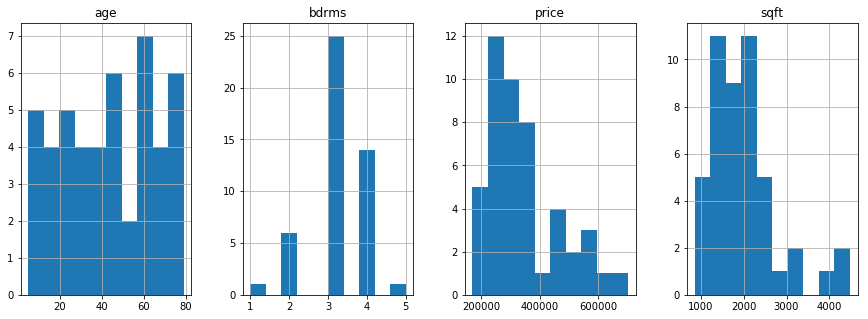

In [44]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,4,figsize=(15, 5))
df.hist(ax=axis)

In [45]:
X = df[['age', 'bdrms', 'sqft']]
Y = df['price'].values

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [46]:
X.describe()

,age,bdrms,sqft
count,47.000000,47.000000,47.000000
mean,42.744681,3.170213,2000.680851
std,22.873440,0.760982,794.702354
min,5.000000,1.000000,852.000000
25%,24.500000,3.000000,1432.000000
50%,44.000000,3.000000,1888.000000
75%,61.500000,4.000000,2269.000000
max,79.000000,5.000000,4478.000000


In [57]:
# Data standardization
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)
Y = scalar.fit_transform(Y.reshape(-1, 1))

# print(type(X))
# print(type(Y))

# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

# print(X.shape)
# print(Y.shape)

# (47, 3)
# (47, 1)

In [48]:
Y = Y.flatten()

# print(Y.shape)
# (47,)

In [49]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# (37, 3)
# (37,)
# (10, 3)
# (10,)

In [50]:
from keras.layers import Input, Dense
from keras.models import Model

In [51]:
K = 1
visible = Input(shape=(3,))
output = Dense(K)(visible)

model = Model(inputs=visible, outputs=output)

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)

In [54]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=0, shuffle=True)

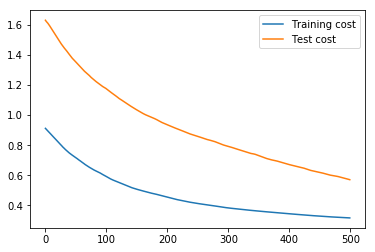

In [55]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import r2_score

Yhat = model.predict(X_test).flatten()
# Yhat.shape
# (10,)

r2_score(y_test, Yhat)

0.58611016520696091

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).